In [3]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## (Optional) Review Problems

Consider an autonomous vehicle using cameras to detect pedestrians. Each ride there is a 1% chance of cameras failing. Provided that you own a car and you take your car out for 3 rides. 
- Your camera failed on the first ride. What is the probability that your cameras fail on the 2nd ride?
What is the probability:
- you have 1, 2 or 3 rides with camera failures
- you have 1 ride with camera failures?

In [38]:
def failure_simulation():
    results = make_array()
    for i in np.arange(3):
        result = np.random.choice(['Failure', 'No Failure'], p = [0.01, 0.99])
        results = np.append(results, result)
    return results

#### (A) $$P(Camera\:failure\:on\:the\:2nd\:ride)$$

In [48]:
calculation = 0.01

0.0099


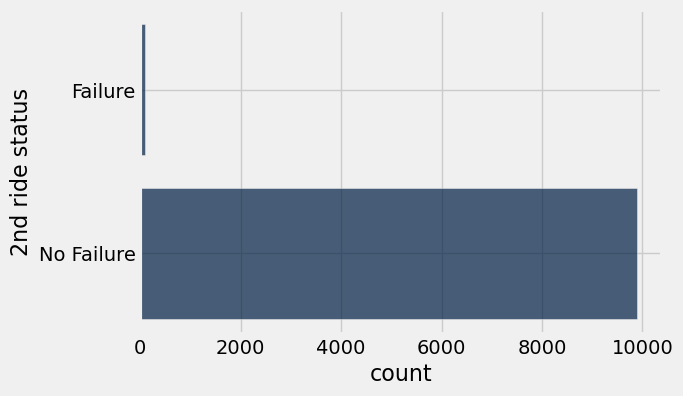

In [39]:
items = make_array()
for i in np.arange(10000):
    status_on_2nd = failure_simulation().item(1)
    items = np.append(items, status_on_2nd)
tbl = Table().with_column('2nd ride status', items).group('2nd ride status')
tbl.barh('2nd ride status')
print(np.mean(items == 'Failure'))

#### (B) $$P(More\:than\:1\:camera\:failure)$$

In [ ]:
calculation_b = ...

0.0005


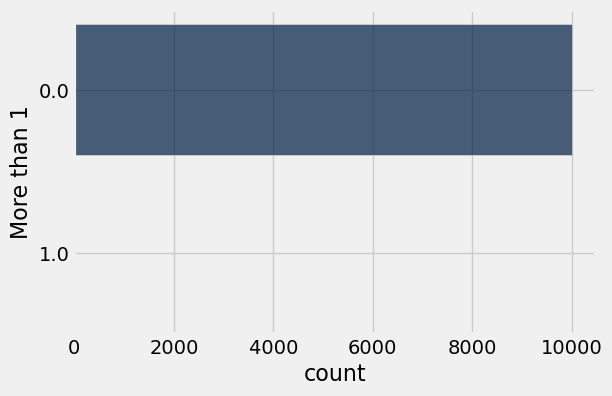

In [49]:
items_b = make_array()
for i in np.arange(10000):
    more_than_1_failure = sum(failure_simulation() == 'Failure') > 1
    items_b = np.append(items_b, more_than_1_failure)
tbl = Table().with_column('More than 1', items_b).group('More than 1')
tbl.barh('More than 1')
print(np.mean(items_b))

#### (C) $$P(1\:camera\:failure)$$

In [1]:
calculation_c = ...

0.0289


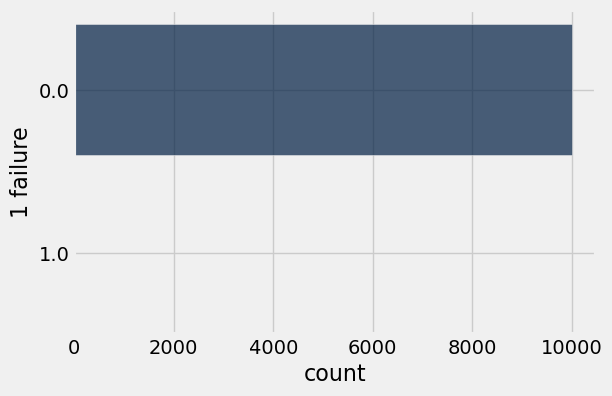

In [47]:
items_c = make_array()
for i in np.arange(10000):
    one_failure = sum(failure_simulation() == 'Failure') == 1
    items_c = np.append(items_c, one_failure)
tbl = Table().with_column('1 failure', items_b).group('1 failure')
tbl.barh('1 failure')
print(np.mean(items_c))

## Random Samples ##

We load in a dataset of all United flights national flights from 6/1/15 to 8/9/15, their destination, and how long they were delayed in minutes.

In [4]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(0, united.num_rows))
united

Date,Flight Number,Destination,Delay,Row
6/1/15,73,HNL,257,0
6/1/15,217,EWR,28,1
6/1/15,237,STL,-3,2
6/1/15,250,SAN,0,3
6/1/15,267,PHL,64,4
6/1/15,273,SEA,-6,5
6/1/15,278,SEA,-8,6
6/1/15,292,EWR,12,7
6/1/15,300,HNL,20,8
6/1/15,317,IND,-10,9


### Some deterministic samples:

In [3]:
# The same destination
united.where("Destination", "JFK")

Date,Flight Number,Destination,Delay,Row
6/1/15,502,JFK,-4,26
6/1/15,637,JFK,141,33
6/1/15,704,JFK,-8,39
6/1/15,758,JFK,-5,50
6/1/15,760,JFK,352,51
6/1/15,824,JFK,3,56
6/1/15,898,JFK,290,57
6/2/15,502,JFK,0,179
6/2/15,637,JFK,202,188
6/2/15,704,JFK,-11,194


In [4]:
# Every 1,000 flights
united.take(np.arange(0, united.num_rows, 1000))

Date,Flight Number,Destination,Delay,Row
6/1/15,73,HNL,257,0
6/7/15,1692,EWR,7,1000
6/14/15,824,JFK,-1,2000
6/21/15,217,EWR,5,3000
6/27/15,1401,SAN,-4,4000
7/4/15,1614,LAS,-2,5000
7/11/15,401,CLE,4,6000
7/17/15,1645,IAD,0,7000
7/24/15,624,ORD,61,8000
7/30/15,1728,ORD,209,9000


In [7]:
# Random row numbers
united.take(make_array(77, 103, 2405))

Date,Flight Number,Destination,Delay,Row
6/1/15,1156,EWR,10,77
6/1/15,1474,DEN,-1,103
6/17/15,256,AUS,205,2405


In [9]:
united.num_rows

13825

In [6]:
start = np.random.choice(np.arange(united.num_rows))
systematic_sample = united.take(np.arange(start, united.num_rows, 1000))
systematic_sample

Date,Flight Number,Destination,Delay,Row
8/16/15,1559,IAH,1,11605
8/23/15,1197,IAH,20,12605
8/30/15,1127,ORD,-4,13605


## Empirical Distributions ##

In [11]:
# A table called `die` where each row represents a side of a die
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


In [12]:
# Randomly sample 10 rolls of a die 
die.sample(10)

Face
5
4
6
4
1
4
1
4
2
3


A first histogram (looks weird):

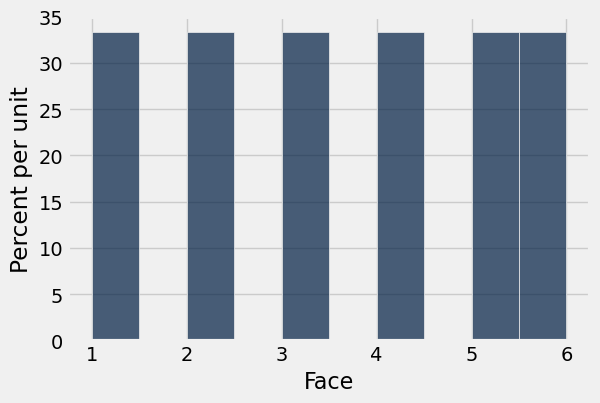

In [13]:
die.hist()

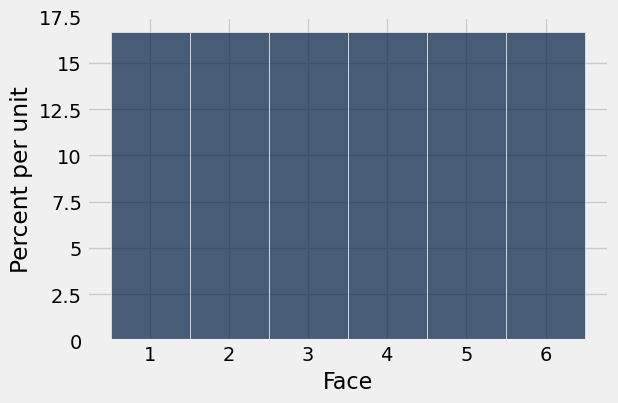

In [9]:
# Probability distribution
die.hist(bins=np.arange(0.5, 6.6, 1))

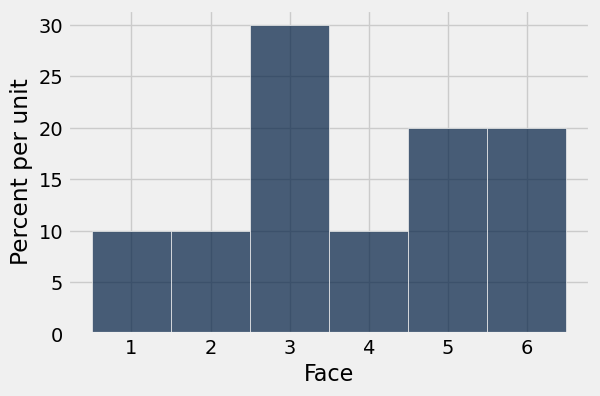

In [10]:
# Empirical distribution of 10 rolls
die.sample(10).hist(bins=np.arange(0.5, 6.6, 1))

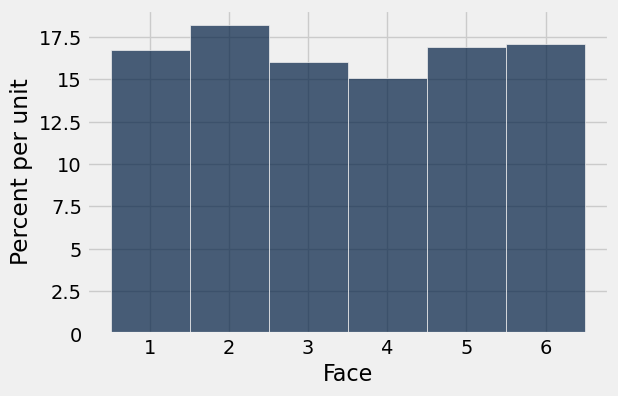

In [11]:
# Empirical distribution of 1,000 rolls
die.sample(1000).hist(bins=np.arange(0.5, 6.6, 1))

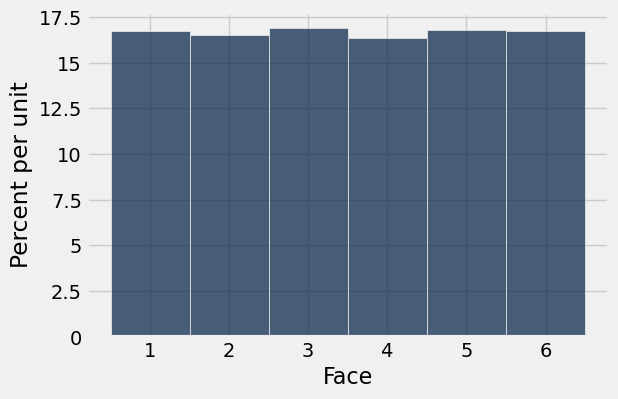

In [12]:
# Empirical distribution of 10,000 rolls
die.sample(10000).hist(bins=np.arange(0.5, 6.6, 1))

## Sampling from categorical distributions with `sample_proportions` ##

According to the CDC, about 10% of Americans 18 and over suffer from a depressive illness in any given year. [[source](https://www.cdc.gov/workplacehealthpromotion/health-strategies/depression/index.html)]

In [17]:
# Probability distribution
distribution_in_pop = make_array(0.9, 0.1)
distribution_in_pop

array([ 0.9,  0.1])

Suppose you have a group of 100 people. Let's simulate how many might suffer from a depressive illness, assuming we can treat each person as if they were drawn randomly from the population of US adults (a dubious assumption).

In [18]:
# Empirical distribution size 100
distribution_in_sample = sample_proportions(100, distribution_in_pop)
distribution_in_sample

array([ 0.87,  0.13])

In [19]:
distribution_in_sample = sample_proportions(100000, distribution_in_pop)
distribution_in_sample

array([ 0.89988,  0.10012])

## Large Random Samples from a table

Here, we create bins that range from -20 to 200 and have a step size of 5. We'll use these bins to visualize the distribution of United flights.

In [22]:
# Create bins & show the table again
united_bins = np.arange(-20, 201, 5)

united

Date,Flight Number,Destination,Delay,Row
6/1/15,73,HNL,257,0
6/1/15,217,EWR,28,1
6/1/15,237,STL,-3,2
6/1/15,250,SAN,0,3
6/1/15,267,PHL,64,4
6/1/15,273,SEA,-6,5
6/1/15,278,SEA,-8,6
6/1/15,292,EWR,12,7
6/1/15,300,HNL,20,8
6/1/15,317,IND,-10,9


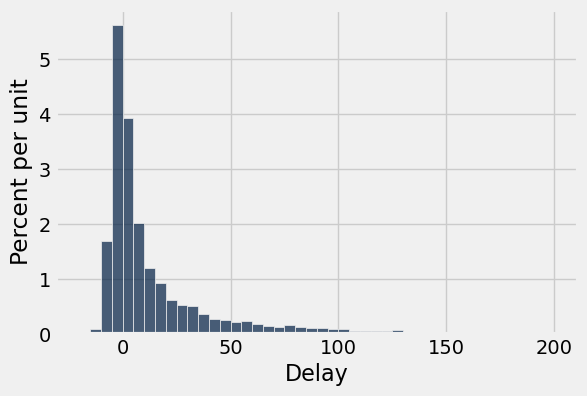

In [14]:
# Probability Distribution
united.hist('Delay', bins = united_bins)

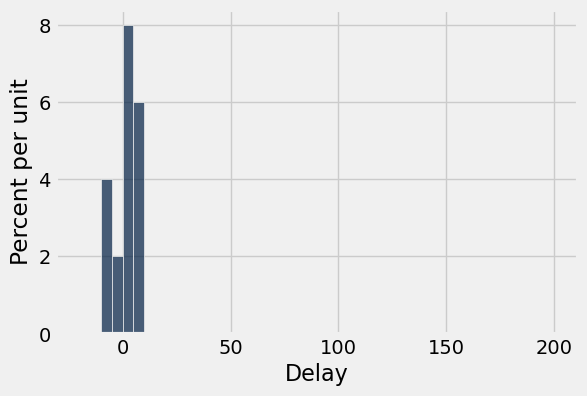

In [15]:
# Empirical Distribution of 10 flights
united.sample(10).hist('Delay', bins = united_bins)

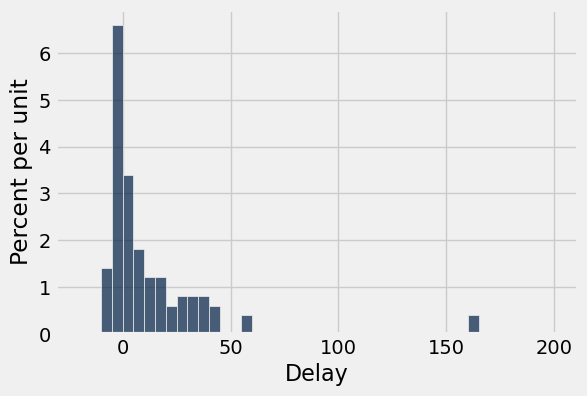

In [16]:
# Empirical Distribution of 100 flights
united.sample(100).hist('Delay', bins = united_bins)

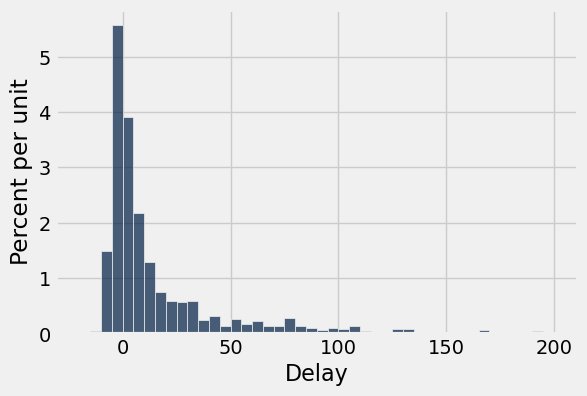

In [17]:
# Empirical Distribution of 1,000 flights
united.sample(1000).hist('Delay', bins = united_bins)

## Simulating Statistics ##

In [25]:
# (Population) Parameter
np.median(united.column('Delay'))

2.0

In [26]:
# (Sample) Statistic
np.median(united.sample(10).column('Delay'))

8.0

## Empirical Distribution of a Statistic ##

In [27]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [28]:
# Call the function with a sample size = 10
sample_median(10)

10.5

In [29]:
# Call the function 1,000 times with a sample size = 10 & store the results
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

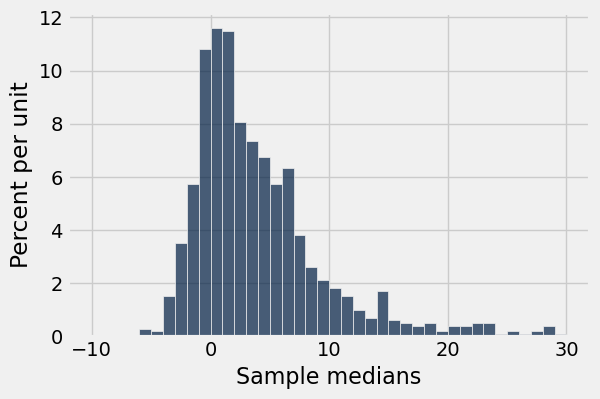

In [30]:
# Show the empirical distribution of sample size = 10
Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))

In [31]:
# Call the function 1,000 times with a sample size = 1,000 & store the results
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(1000)
    sample_medians = np.append(sample_medians, new_median)

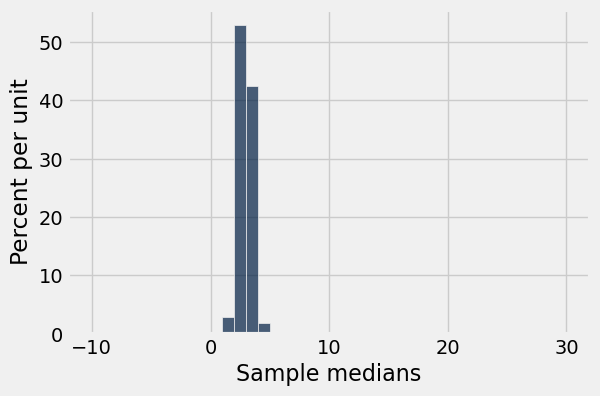

In [32]:
# Show the empirical distribution of sample size = 1,000
Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))